<a href="https://colab.research.google.com/github/yuks0810/Diabetes-Classification-KNN-kaggle-/blob/master/Diabetes_Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Step by Step Diabetes Classification-KNN-detailedPython](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

[Pima Indian Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [0]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

#### OSEMN Pipeline
**O - Obtaining our data<br>**
まずデータを入手してください。データがなければ何もできません。データを取得して、手元で使える形で保存しましょう。
ex) RDB, SQL, text, video, audio files, csv etc..l

**S - Scrubbing / Cleaning our data**<br>
このフェーズが一番時間と労力を要します。ここでどれだけ有力なデータを抽出してモデルを作成するかで、モデルの良し悪しが左右されます。
ex)
- データを理解する: データ構造や、カラムの意味、null値や破損データを把握する
- データのクリーンアップ： データを理解する段階で出てきたnull値やmissing data、破損データなどを取り除く

**E - Exploring / Visualizing our data will allow us to find patterns and trends**<br>
このフェーズではデータがどのような傾向やパターンを持っているかを探していく。この段階では、データをグラフ化したり、統計のテクニックを利用してデータのパターンを紐解いていき、仮説を立てる。
- データのパターンをグラフや統計知識を利用して見つける
- 統計学を利用してデータの特徴を抽出していく

**M - Modeling our data will give us our predictive power as a wizard**
このフェーズで機械学習のテクニックを利用して予測やクラス分けをするためのモデルをデータから作成していく。
- モデルの作成
- 作成したモデルの評価（訓練データのみではなく、未知のデータをモデルに入れたときにどのような結果が出るか、過学習していないかなど）

**※必要な知識**
- 教師あり／教師なし学習
- モデルの評価
- Python(Sci-kit Learn) / R (CARET)
- 線形代数・多変量解析

**N - INterpreting our data**<br>
一番重要なポイント：<br>
今まで行ってきたモデリングとデータ分析の内容をビジネスに活かすために顧客に伝える。
どれだけ良いデータ分析、モデルを作成しても、それを伝えることができなければ何もないのと一緒。

- ビジネス上の問題を解決する方法を説明する。どのように作成したモデルがビジネス課題を解決できるかを伝える。
- 作成したモデル、データ分析の内容をわかりやすいようにビジュアライズ化する。

必要スキル：
- Business Domain Knowledge
- Data Visualization Tools: Tablaeu, D3.JS, Matplotlib, GGplot, Seaborn
- Communication: Presenting/Speaking & Reporting/Writing

参考：<br>
https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

In [14]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/データセット/Pima_Indian_Ditabetes/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic EDA and statistical analysis



In [16]:
## データタイプやカラム、null値の数、メモリー使用量などの要約表示
## ドキュメント : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`DataFrame.describe（）`メソッドは、NaN値を除く、データセットの分布の中心的な傾向、分散、および形状を要約する記述統計を生成します。 このメソッドでデータの要約を大まかに確認することができます。 重要な点は、`describe（）`メソッドは数値のみを処理することです。 カテゴリデータの場合は使うことができません。 したがって、列にカテゴリ値がある場合、`describe（）`メソッドはそれを無視し、パラメーターinclude = "all"が渡されない限り、他の列の概要を表示します。

ここで、describe（）メソッドによって生成される統計について理解しましょう。

countは、データの空でない行の数を示します。
meanは、そのデータの平均値を示します。
stdは、データの標準偏差値を示します。
minは、データの最小値を示します。
25％、50％、75％は各データのパーセンタイル/四分位数です。 この四分位情報は、外れ値を検出するのに役立ちます。
maxは、データの最大値を示します。

In [18]:
## 基本的な統計情報を出力します（数量データのみ対象で、カテゴリカルデータでは機能しません。カテゴリカルデータを使いたい場合はパラメータにinclude = "all"を渡してあげると使用できます）
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##　to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetes_data.describe().T # 転置

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


これらのデータのminが0になっていますが、これは正しいでしょうか？
おそらく、これらのデータが0になることはないのでnanに置き換える方が無難でしょう
1.   Glucose
2.   BloodPressure
3.   Skin Thickness
4. Insulin
5. BMI



In [20]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Nanデータを埋めるにあたって、データの分布を確認した方が良いでしょう**

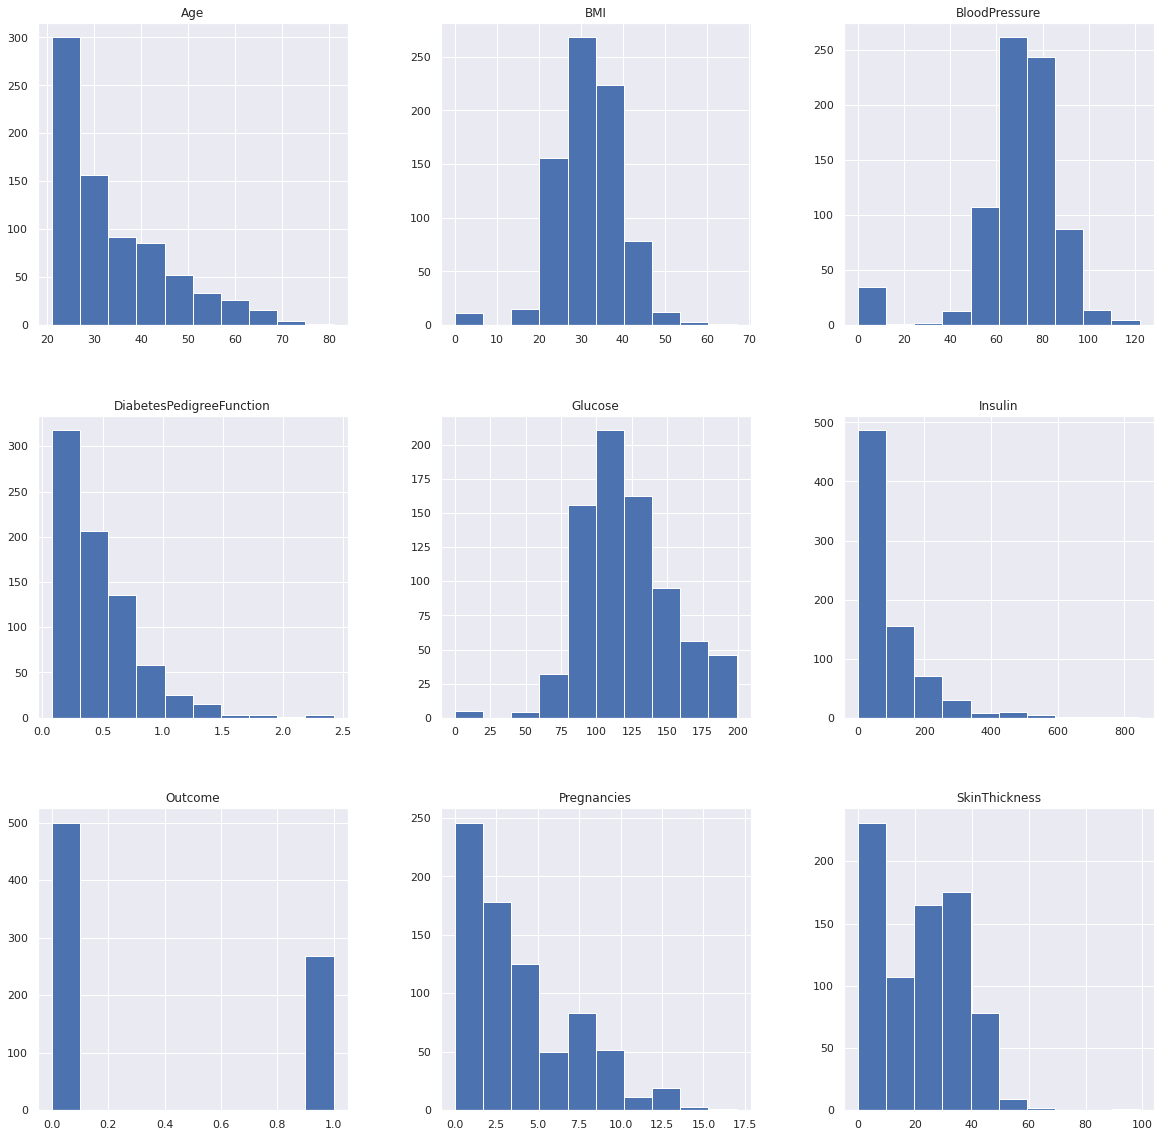

In [21]:
p = diabetes_data.hist(figsize = (20,20))

In [0]:
# fillnaで欠損値を除外
# https://note.nkmk.me/python-pandas-nan-dropna-fillna/

diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

**Nan値を消した後に再度表示**

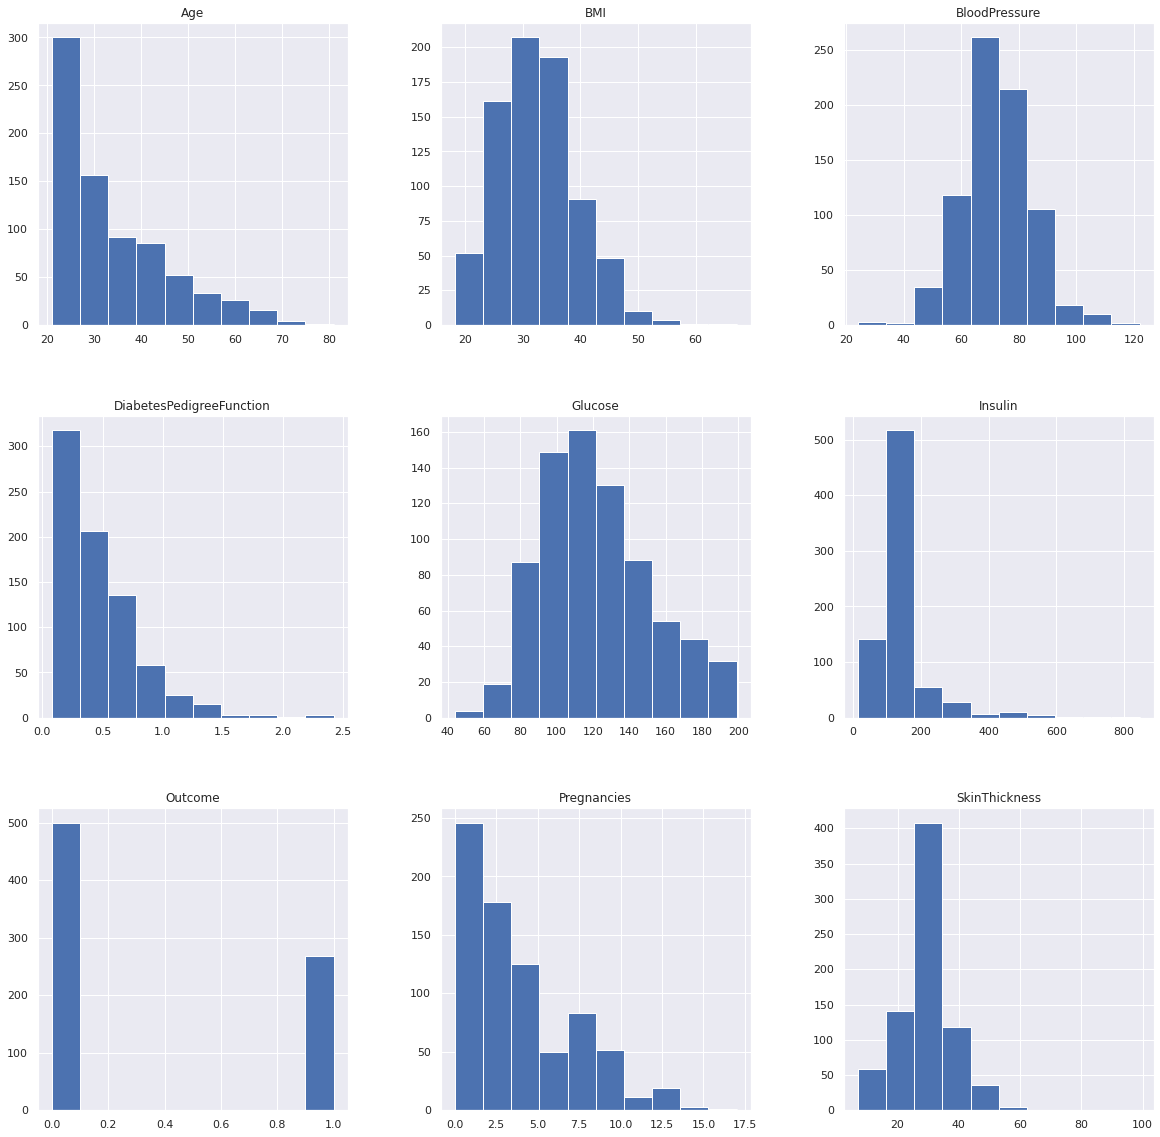

In [23]:
p = diabetes_data_copy.hist(figsize = (20,20))


一つ前の分布図と比較してみると0のところにあったデータの棒グラフがなくなっている

## 歪度
左に歪んだ分布は、左裾が長くなります。 左に歪んだ分布は、負に歪んだ分布とも呼ばれます。 これは、数直線の負の方向に長い尾があるためです。 平均値もピークの左側にあります。

右に歪んだ分布は長い右裾を持っています。 右スキュー分布は、正スキュー分布とも呼ばれます。 これは、数直線の正方向に長い尾があるためです。 平均値もピークの右側にあります。


![歪度画像](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

In [24]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

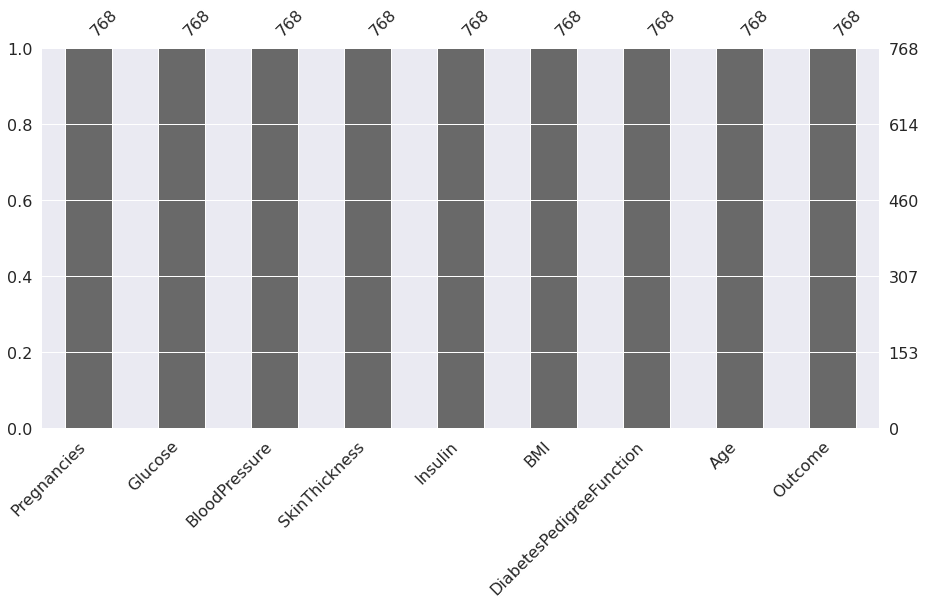

In [33]:
## null値をカウント
import missingno as msno
p=msno.bar(diabetes_data, figsize=(15, 7))

0    500
1    268
Name: Outcome, dtype: int64


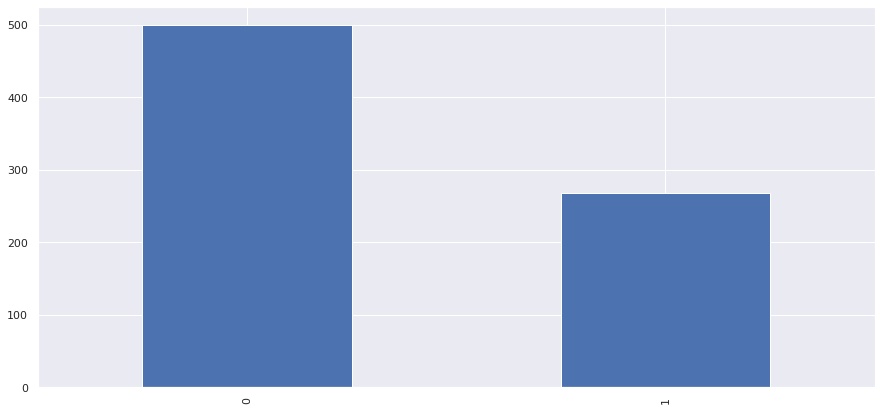

In [41]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar", figsize=(15, 7))

# 教師データの0, 1のカウントとそのバランスを棒グラフで表示

上のグラフは、結果が0であるデータポイントにデータが偏っていることを示しています。これは、糖尿病が実際に存在しなかったことを意味します。 非糖尿病患者の数は糖尿病患者の数のほぼ2倍です
クリーニングされていないデータの散布行列

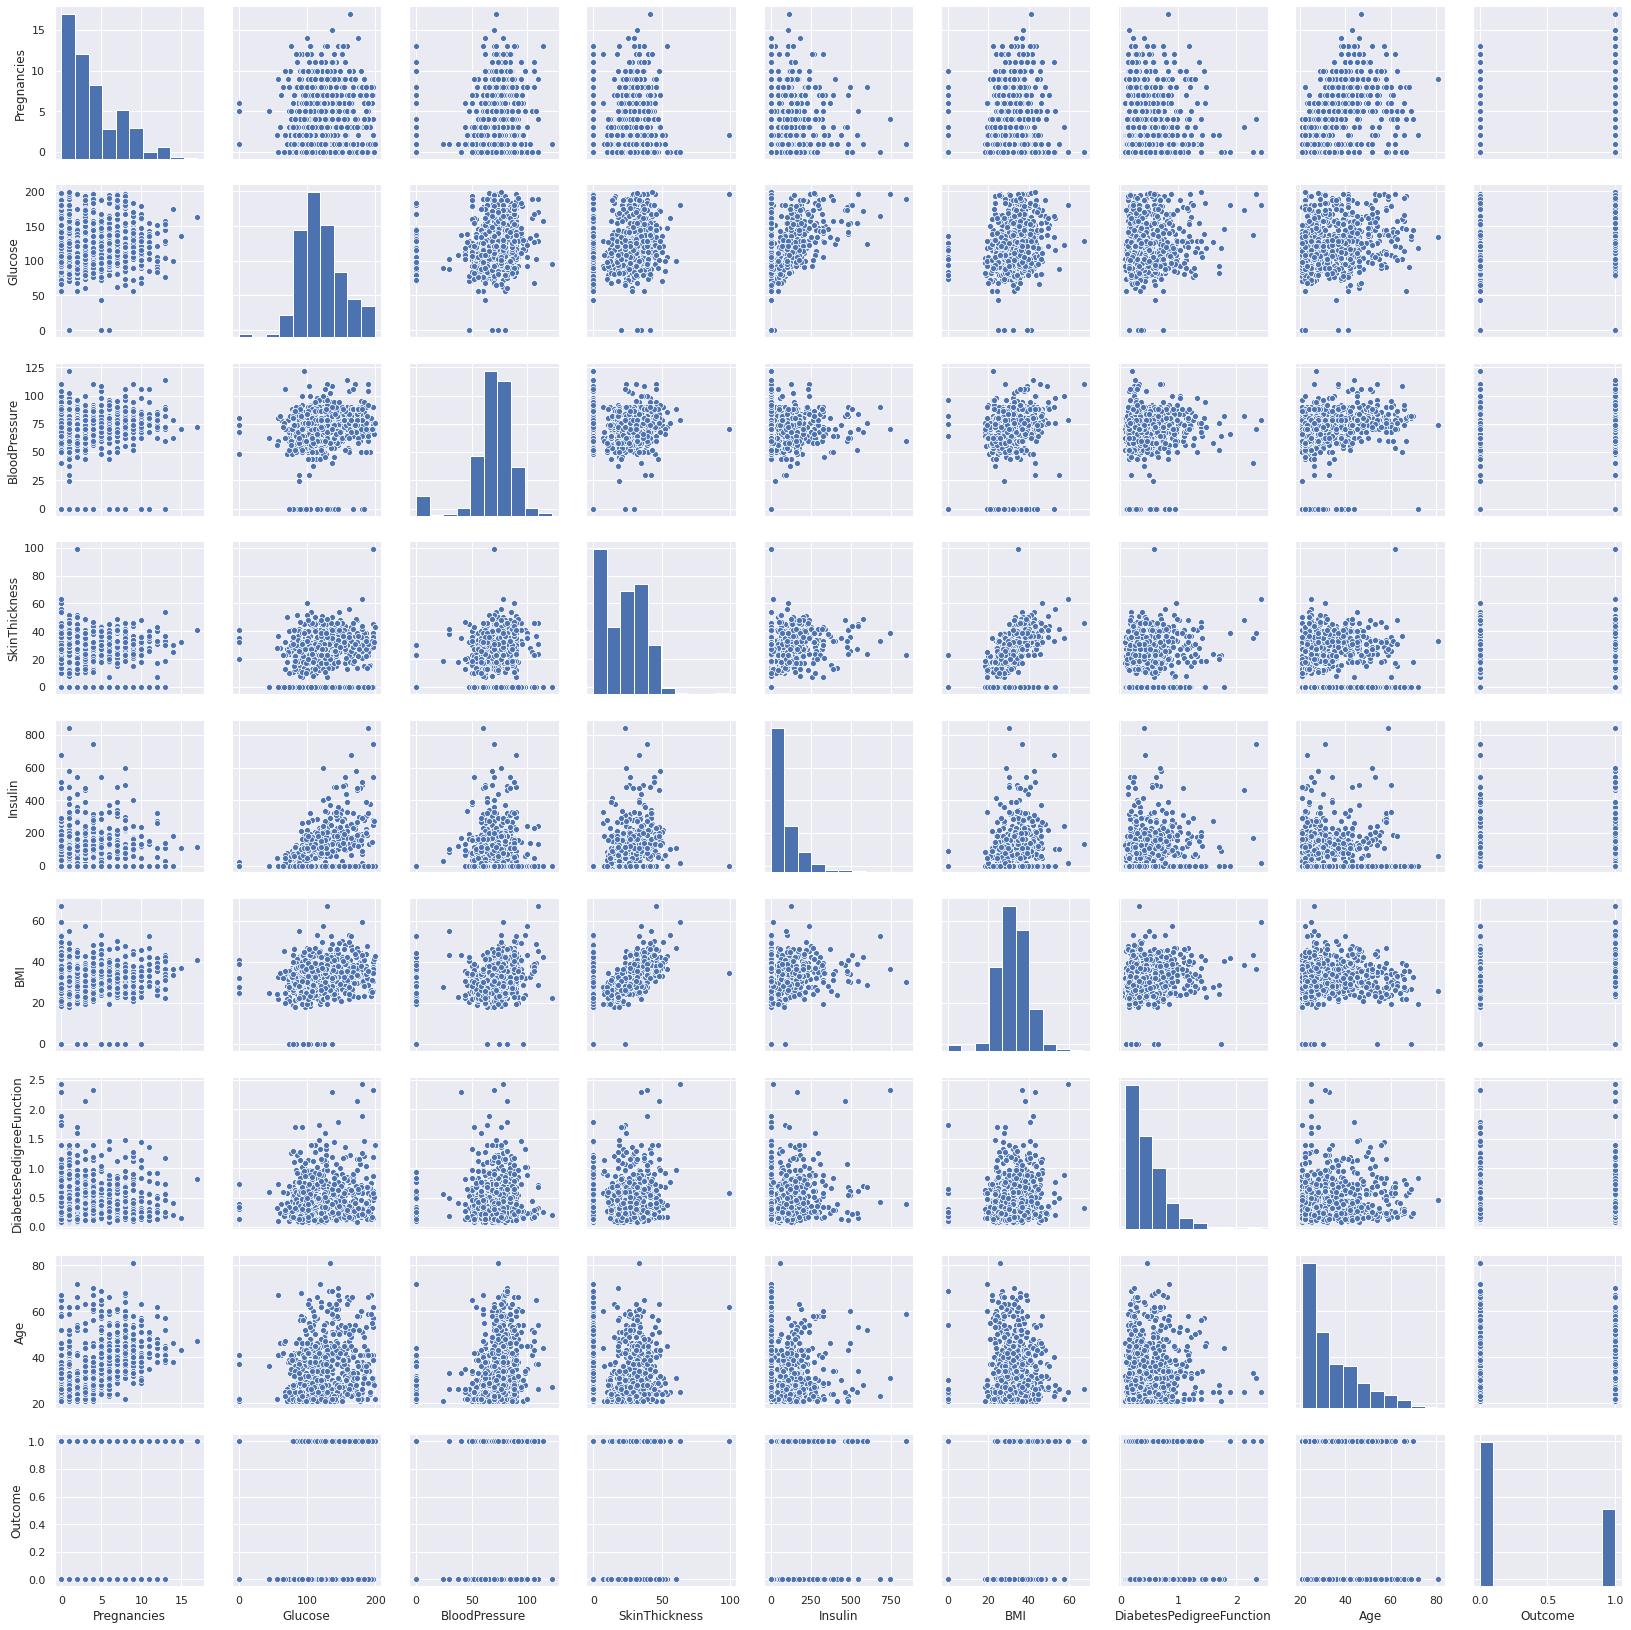

In [60]:
p=sns.pairplot(diabetes_data)
# p.fig.set_size_inches(20,20)

ペアプロットは、ヒストグラムと散布図の2つの基本的な数値に基づいて作成されます。 対角線上のヒストグラムでは、1つの変数の分布を確認できますが、上と下の三角形の散布図は2つの変数間の関係（またはその欠如）を示しています。

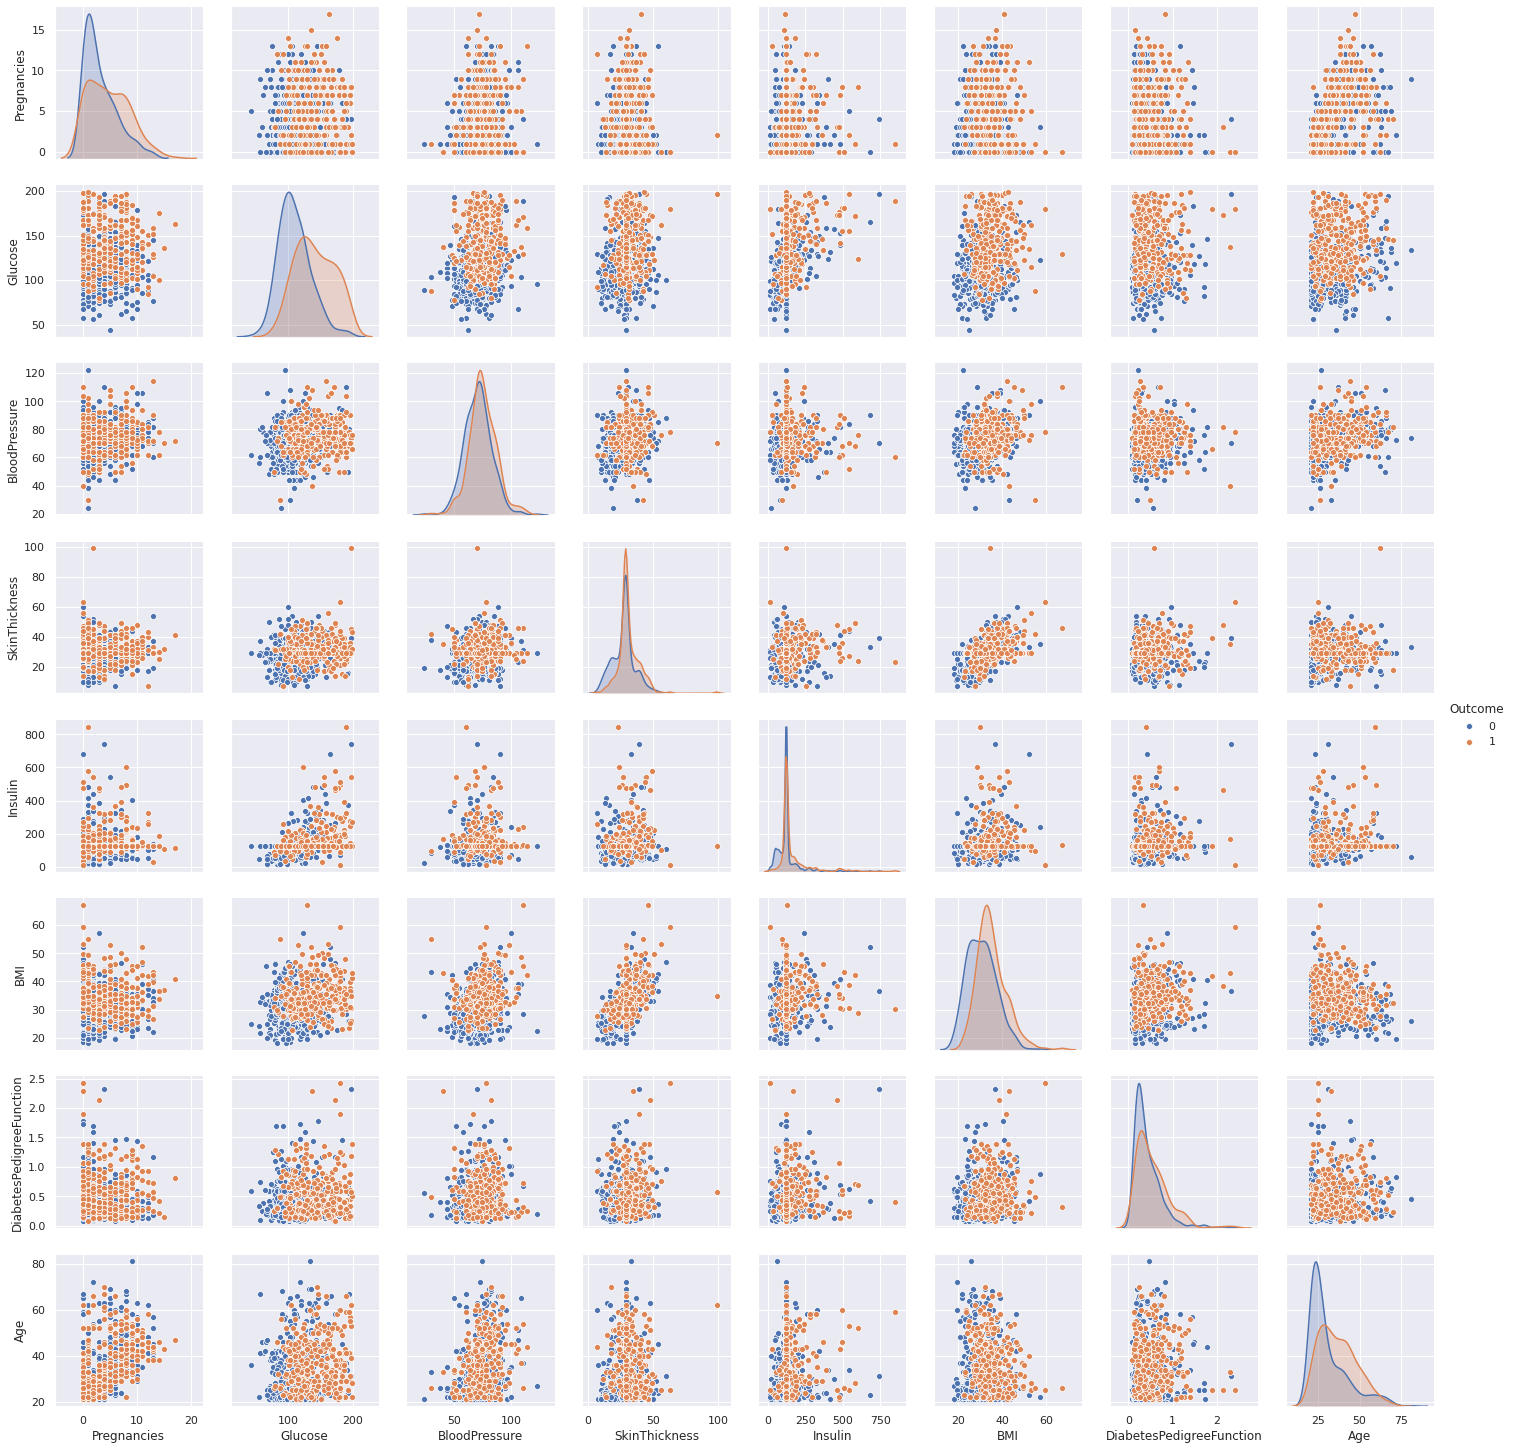

In [61]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

ピアソンの相関係数：2つの量の間の関係を見つけるのに役立ちます。 2つの変数間の関連の強さの尺度を提供します。 ピアソンの相関係数の値は、-1から+1の間です。 1は相関が高いことを意味し、0は相関がないことを意味します。

ヒートマップは、色を使用して情報を2次元で表現したものです。 ヒートマップは、ユーザーが単純な情報または複雑な情報を視覚化するのに役立ちます。

**Heatmap for unclean data**

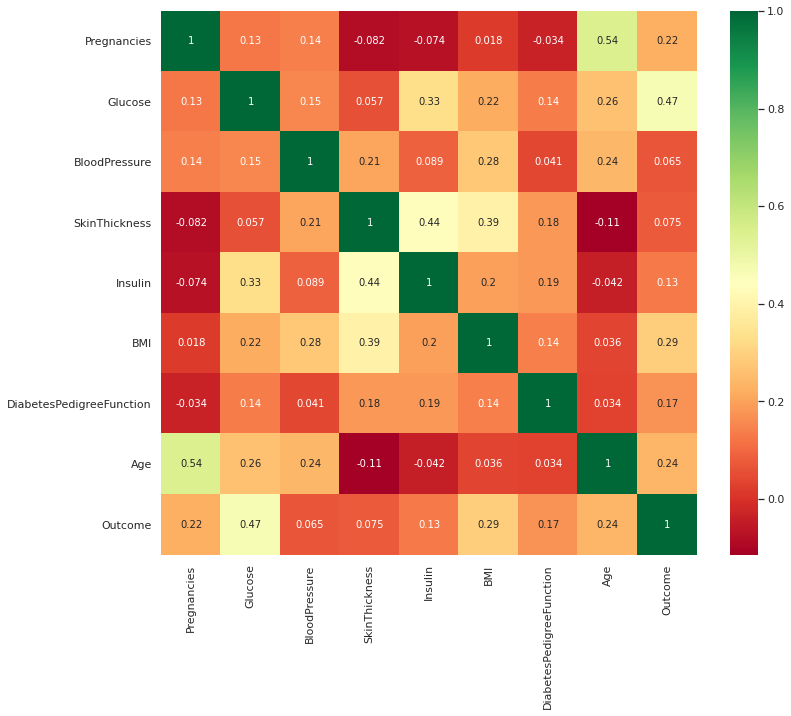

In [62]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

**Heatmap for clean data**

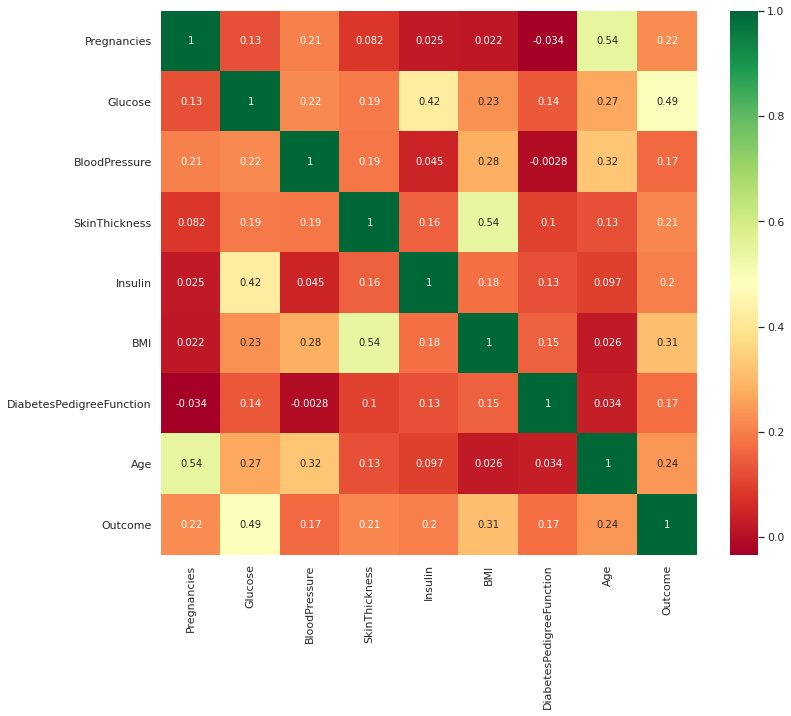

In [63]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmapは各データの相関関係を可視化しており。1に近いほど相関関係あり、0に近いほど相関がないことを表している。

この場合、AgeとPregnanciesは高い相関関係があると言えるだろう

## データの正規化

In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [0]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

#### **トレーニングデータ分割とクロス検証メソッド<br>**
**トレーニングデータの分割:**モデルのトレーニングに使用したのと同じポイントでテストするのではなく、データをテストするために不明なデータポイントを設定します。 これにより、モデルのパフォーマンスをより適切に把握できます。

**交差検証：**モデルがトレーニングとテストに分割されると、特定のデータがトレーニングまたはテスト部分に偏ってしまう可能性があります。 これにより、モデルのパフォーマンスが低下します。 交差検証手法を使用して、過剰適合および過小適合の問題を回避できます。
交差検証では、ひとつづつデータを検証していくのでデータの偏りが発生しない。

**Stratifyについて：**Stratifyパラメータは、生成されたサンプルの値の比率がパラメータstratifyに提供された値の比率と同じになるように分割します。

たとえば、変数yが値0と1のバイナリカテゴリ変数であり、0の25％と1の75％がある場合、stratify = yは、ランダム分割が0の25％と1の75％であることを確認します。
教師データの偏りによって、トレーニング時にどちらかのデータが多くなってしまうとモデルに影響するので同じ配分で分割するようにする

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


In [0]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# kが1~15の間でそれぞれモデルをfitさせてテストスコアを配列に入れている
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [68]:
# 訓練データの検証でのmaxスコア
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [69]:
# テストデータの検証でのmaxスコア
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score 76.5625 % and k = [11]


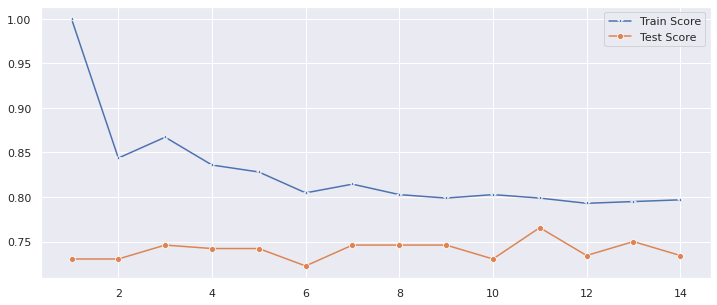

In [71]:
#　訓練データとテストデータでのテスト時に各データのテストスコアを折れ線グラフで表示する。(1~15の間)
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [72]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

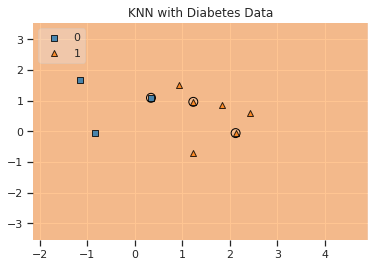

In [75]:
# 決定境界を可視化
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()